In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from utils.visualize import *
from utils.FIR_filter import *
from utils.signal_process import *
from utils.preprocess import *
from utils.model import *
import utils.vision_transformer as VT

import torch
from torch.utils.data import Dataset, DataLoader

import pickle

# Feature: Q omega omega_l2 ANC

In [2]:
# Load dataset
dataset_dir = "dataset/"
dataset_name = "17P_32"
pkl_test = pickle.load(open(os.path.join(dataset_dir, f'{dataset_name}_test.pkl'), 'rb'))
input_test, gt_test = pkl_test['input'], pkl_test['gt']

num_channels = input_test.shape[1]
num_freq_bins = input_test.shape[2]
num_time_steps = input_test.shape[3]

dataset_test = IMUSpectrogramDataset(input_test, gt_test)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

MAE_32 = []

# Load models
# 2-D spectrogram
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_name = ['MLP_17P_32', 'CNN_17P_32', 'VT_17P_32_emt2', 'VT_17P_32_emht2']
models_name_show = ["MLP", "CNN", "ViT_emt2", "ViT_emht2"]

models = [MLP_out1(num_freq_bins, num_time_steps, num_channels=num_channels),
          CNN_out1_2(num_channels=num_channels),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, device=device),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, num_heads=8, device=device)]

for i in range(len(models_name)):
    models[i].load_state_dict(torch.load(f'./models/{str(models_name[i])}.pt'))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Evaluate model in whole testing set
    mse, mae = evaluate_model(models[i], test_loader, model_name=models_name[i], device=device)
    MAE_32.append(mae)

MLP_17P_32 Evaluation Results - MSE Loss: 0.0056, L1 Loss: 2.9242 1/min
CNN_17P_32 Evaluation Results - MSE Loss: 0.0042, L1 Loss: 2.8597 1/min
VT_17P_32_emt2 Evaluation Results - MSE Loss: 0.0050, L1 Loss: 3.1276 1/min
VT_17P_32_emht2 Evaluation Results - MSE Loss: 0.0055, L1 Loss: 3.2954 1/min


# Feature: Q omega omega_l2

In [3]:
# Load dataset
dataset_dir = "dataset/"
dataset_name = "17P_16"
pkl_test = pickle.load(open(os.path.join(dataset_dir, f'{dataset_name}_test.pkl'), 'rb'))
input_test, gt_test = pkl_test['input'], pkl_test['gt']

num_channels = input_test.shape[1]
num_freq_bins = input_test.shape[2]
num_time_steps = input_test.shape[3]

dataset_test = IMUSpectrogramDataset(input_test, gt_test)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

MAE_16 = []

# Load models
# 2-D spectrogram
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_name = ['MLP_17P_16', 'CNN_17P_16', 'VT_17P_16_emt2', 'VT_17P_16_emht2']
models_name_show = ["MLP", "CNN", "ViT_emt2", "ViT_emht2"]

models = [MLP_out1(num_freq_bins, num_time_steps, num_channels=num_channels),
          CNN_out1_2(num_channels=num_channels),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, device=device),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, num_heads=8, device=device)]

for i in range(len(models_name)):
    models[i].load_state_dict(torch.load(f'./models/{str(models_name[i])}.pt'))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Evaluate model in whole testing set
    mse, mae = evaluate_model(models[i], test_loader, model_name=models_name[i], device=device)
    MAE_16.append(mae)

MLP_17P_16 Evaluation Results - MSE Loss: 0.0063, L1 Loss: 3.0880 1/min
CNN_17P_16 Evaluation Results - MSE Loss: 0.0049, L1 Loss: 3.1164 1/min
VT_17P_16_emt2 Evaluation Results - MSE Loss: 0.0054, L1 Loss: 3.4363 1/min
VT_17P_16_emht2 Evaluation Results - MSE Loss: 0.0049, L1 Loss: 3.0538 1/min


# Feature: Q ANC

In [4]:
# Load dataset
dataset_dir = "dataset/"
dataset_name = "17P_Q+ANC"
pkl_test = pickle.load(open(os.path.join(dataset_dir, f'{dataset_name}_test.pkl'), 'rb'))
input_test, gt_test = pkl_test['input'], pkl_test['gt']

num_channels = input_test.shape[1]
num_freq_bins = input_test.shape[2]
num_time_steps = input_test.shape[3]

dataset_test = IMUSpectrogramDataset(input_test, gt_test)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

MAE_QANC = []

# Load models
# 2-D spectrogram
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_name = ['MLP_17P_Q+ANC', 'CNN_17P_Q+ANC', 'VT_17P_Q+ANC_emt2', 'VT_17P_Q+ANC_emht2']
models_name_show = ["MLP", "CNN", "ViT_emt2", "ViT_emht2"]

models = [MLP_out1(num_freq_bins, num_time_steps, num_channels=num_channels),
          CNN_out1_2(num_channels=num_channels),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, device=device),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, num_heads=8, device=device)]

for i in range(len(models_name)):
    models[i].load_state_dict(torch.load(f'./models/{str(models_name[i])}.pt'))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Evaluate model in whole testing set
    mse, mae = evaluate_model(models[i], test_loader, model_name=models_name[i], device=device)
    MAE_QANC.append(mae)

MLP_17P_Q+ANC Evaluation Results - MSE Loss: 0.0043, L1 Loss: 3.0282 1/min
CNN_17P_Q+ANC Evaluation Results - MSE Loss: 0.0038, L1 Loss: 2.7763 1/min
VT_17P_Q+ANC_emt2 Evaluation Results - MSE Loss: 0.0047, L1 Loss: 3.0590 1/min
VT_17P_Q+ANC_emht2 Evaluation Results - MSE Loss: 0.0044, L1 Loss: 3.0938 1/min


# Feature: ANC

In [5]:
# Load dataset
dataset_dir = "dataset/"
dataset_name = "17P_ANC"
pkl_test = pickle.load(open(os.path.join(dataset_dir, f'{dataset_name}_test.pkl'), 'rb'))
input_test, gt_test = pkl_test['input'], pkl_test['gt']

num_channels = input_test.shape[1]
num_freq_bins = input_test.shape[2]
num_time_steps = input_test.shape[3]

dataset_test = IMUSpectrogramDataset(input_test, gt_test)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

MAE_ANC = []

# Load models
# 2-D spectrogram
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_name = ['MLP_17P_ANC', 'CNN_17P_ANC', 'VT_17P_ANC_emt2', 'VT_17P_ANC_emht2']
models_name_show = ["MLP", "CNN", "ViT_emt2", "ViT_emht2"]

models = [MLP_out1(num_freq_bins, num_time_steps, num_channels=num_channels),
          CNN_out1_2(num_channels=num_channels),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, device=device),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, num_heads=8, device=device)]

for i in range(len(models_name)):
    models[i].load_state_dict(torch.load(f'./models/{str(models_name[i])}.pt'))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Evaluate model in whole testing set
    mse, mae = evaluate_model(models[i], test_loader, model_name=models_name[i], device=device)
    MAE_ANC.append(mae)

MLP_17P_ANC Evaluation Results - MSE Loss: 0.0046, L1 Loss: 3.1529 1/min
CNN_17P_ANC Evaluation Results - MSE Loss: 0.0040, L1 Loss: 2.7715 1/min
VT_17P_ANC_emt2 Evaluation Results - MSE Loss: 0.0051, L1 Loss: 3.1678 1/min
VT_17P_ANC_emht2 Evaluation Results - MSE Loss: 0.0050, L1 Loss: 3.1315 1/min


# Feature: Q

In [6]:
# Load dataset
dataset_dir = "dataset/"
dataset_name = "17P_Q"
pkl_test = pickle.load(open(os.path.join(dataset_dir, f'{dataset_name}_test.pkl'), 'rb'))
input_test, gt_test = pkl_test['input'], pkl_test['gt']

num_channels = input_test.shape[1]
num_freq_bins = input_test.shape[2]
num_time_steps = input_test.shape[3]

dataset_test = IMUSpectrogramDataset(input_test, gt_test)
test_loader = DataLoader(dataset_test, batch_size=1, shuffle=True)

MAE_Q = []

# Load models
# 2-D spectrogram
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models_name = ['MLP_17P_Q', 'CNN_17P_Q', 'VT_17P_Q_emt2', 'VT_17P_Q_emht2']
models_name_show = ["MLP", "CNN", "ViT_emt2", "ViT_emht2"]

models = [MLP_out1(num_freq_bins, num_time_steps, num_channels=num_channels),
          CNN_out1_2(num_channels=num_channels),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, device=device),
          VT.ViTRegression(in_channels=num_channels, patch_size=(3, 3), emb_dim=256, mlp_dim=512, num_heads=8, device=device)]

for i in range(len(models_name)):
    models[i].load_state_dict(torch.load(f'./models/{str(models_name[i])}.pt'))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Evaluate model in whole testing set
    mse, mae = evaluate_model(models[i], test_loader, model_name=models_name[i], device=device)
    MAE_Q.append(mae)

MLP_17P_Q Evaluation Results - MSE Loss: 0.0043, L1 Loss: 2.8741 1/min
CNN_17P_Q Evaluation Results - MSE Loss: 0.0045, L1 Loss: 3.1509 1/min
VT_17P_Q_emt2 Evaluation Results - MSE Loss: 0.0046, L1 Loss: 3.1476 1/min
VT_17P_Q_emht2 Evaluation Results - MSE Loss: 0.0044, L1 Loss: 3.0843 1/min


# Visualize

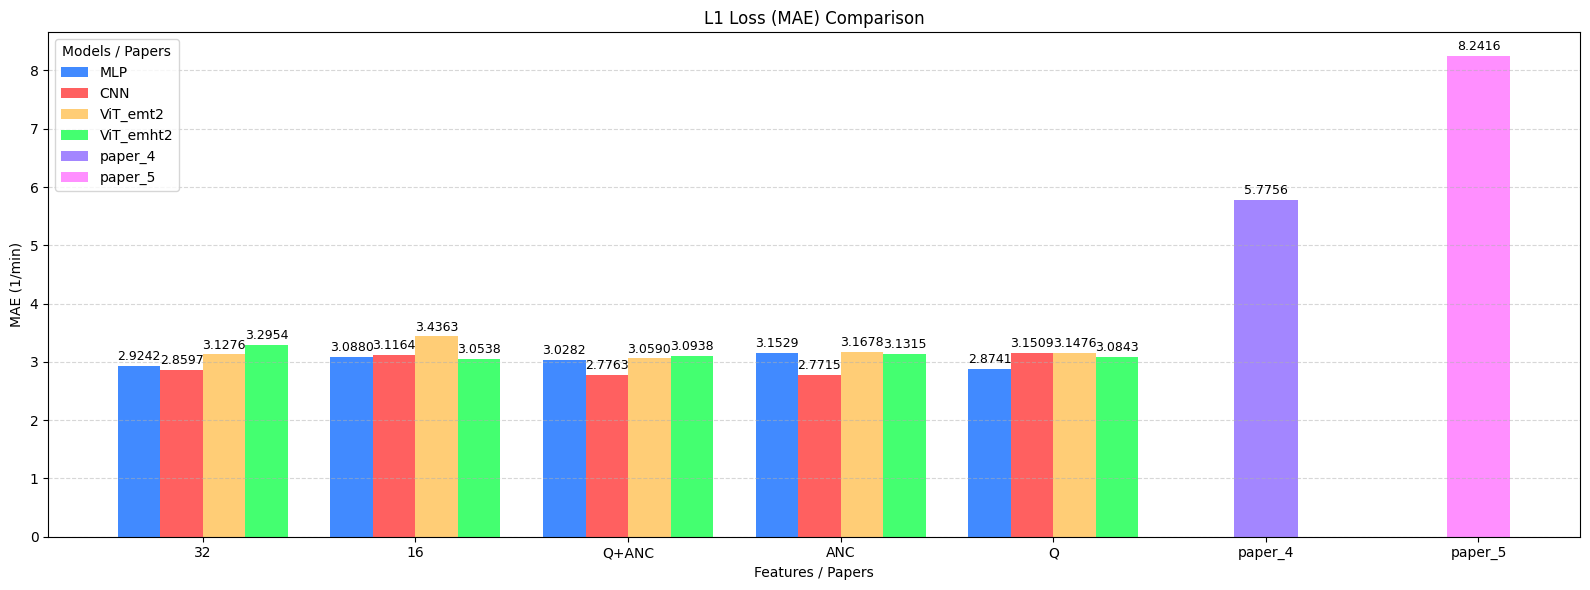

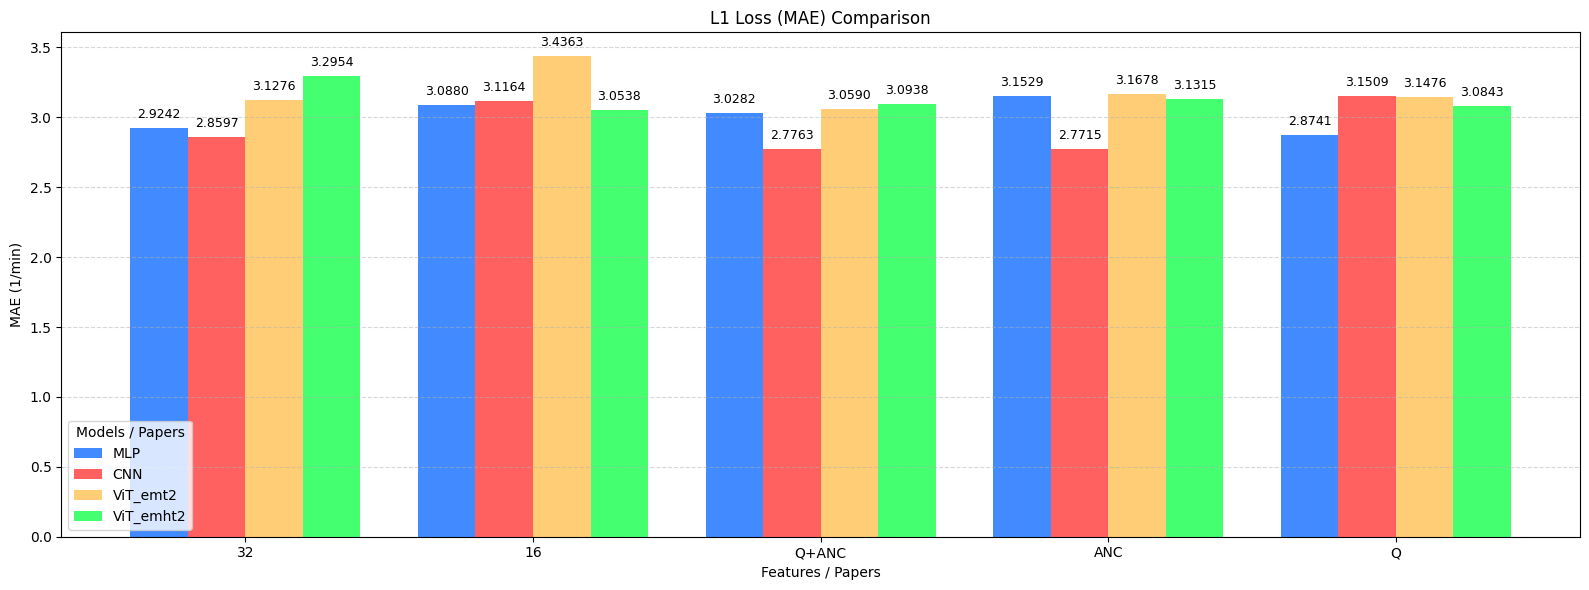

In [7]:
def plot_mae_comparison(mae_ml, mae_paper):
    model_names = mae_ml['model_name']
    features = [key for key in mae_ml if key != 'model_name']
    
    num_models = len(model_names)
    num_features = len(features)
    
    x_labels = features + list(mae_paper.keys())
    x = np.arange(len(x_labels))
    total_bar_width = 0.8
    bar_width = total_bar_width / num_models

    fig, ax = plt.subplots(figsize=(16, 6))

    # Color
    colors = ["#418aff", "#ff6060", "#ffcd76", "#44ff70"]  # MLP, CNN, ViT_emt2, ViT_emht2
    paper_colors = ["#a386ff", "#ff8fff"]      # paper_4, paper_5

    # Model result
    for i, model in enumerate(model_names):
        values = [mae_ml[feat][i] for feat in features]
        bar_positions = x[:num_features] + i * bar_width - total_bar_width / 2 + bar_width / 2
        bars = ax.bar(bar_positions, values, width=bar_width, color=colors[i], label=model)
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.05,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=9)

    # Paper result
    for i, (paper, value) in enumerate(mae_paper.items()):
        pos = x[num_features + i]
        bar = ax.bar(pos, value, width=bar_width * 1.5, color=paper_colors[i], label=paper)
        ax.text(pos, value + 0.05, f'{value:.4f}', ha='center', va='bottom', fontsize=9)

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.set_xlabel("Features / Papers")
    ax.set_ylabel("MAE (1/min)")
    ax.set_title("L1 Loss (MAE) Comparison")
    ax.legend(title="Models / Papers")
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

mae_ml = {
    'model_name': ["MLP", "CNN", "ViT_emt2", "ViT_emht2"],
    '32': MAE_32,
    '16': MAE_16,
    'Q+ANC': MAE_QANC,
    'ANC': MAE_ANC,
    'Q': MAE_Q,
}
mae_paper = {
    'paper_4': 5.7756,
    'paper_5': 8.2416,
}

plot_mae_comparison(mae_ml, mae_paper)
plot_mae_comparison(mae_ml, {})